# Read All Dataset CSV

In [1]:
import os
import csv
import pandas as pd
import numpy as np

In [2]:
dataset_names=[]
X_trains=[]
y_trains=[]
X_tests=[]

path = "C:/Users/User/Desktop/SeniorYearFirstSem/DataScience/Competition1_code/Competition_data"
for folder_name in os.listdir(path):
    print(folder_name)
    dataset_names.append(folder_name)
    X_trains.append(pd.read_csv(f"{path}/{folder_name}/X_train.csv", header=0))
    y_trains.append(pd.read_csv(f"{path}/{folder_name}/y_train.csv", header=0))
    X_tests.append(pd.read_csv(f"{path}/{folder_name}/X_test.csv", header=0))

Dataset_1
Dataset_10
Dataset_11
Dataset_12
Dataset_13
Dataset_14
Dataset_15
Dataset_16
Dataset_17
Dataset_18
Dataset_19
Dataset_2
Dataset_20
Dataset_21
Dataset_22
Dataset_23
Dataset_24
Dataset_25
Dataset_26
Dataset_27
Dataset_28
Dataset_29
Dataset_3
Dataset_30
Dataset_31
Dataset_32
Dataset_33
Dataset_34
Dataset_35
Dataset_36
Dataset_37
Dataset_38
Dataset_39
Dataset_4
Dataset_40
Dataset_41
Dataset_42
Dataset_43
Dataset_44
Dataset_45
Dataset_46
Dataset_47
Dataset_48
Dataset_49
Dataset_5
Dataset_6
Dataset_7
Dataset_8
Dataset_9


## Data Preprocessing & Feature Engineering

In [4]:
## your code here

## train test split & build Model
You can select an appropriate model and perform corresponding hyperparameter tuning.

In [28]:
## Train & Test & Split & Build Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_auc_score
from sklearn.model_selection import cross_val_score

In [4]:
from sklearn.model_selection import GridSearchCV

In [5]:
AUC_set = []

>>> RANDOM FOREST CLASSIFIER

In [6]:
average_auc = 0
for i in range(len(dataset_names)):
    X_train, X_val, y_train, y_val = train_test_split(X_trains[i], y_trains[i], train_size=0.6, random_state=123)
    model = RandomForestClassifier(
            n_estimators=400,       
            max_depth=15,           
            min_samples_split=4,   
            min_samples_leaf=1,
            random_state=42,
            max_features=0.5
            )
    
    model.fit(X_train, y_train.squeeze())

    # Predictions for training and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate AUC for the validation set
    auc = roc_auc_score(y_val, y_val_pred)
    average_auc += auc
    
    # Calculate accuracy for training and validation sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    print(f"Dataset {dataset_names[i]}:")
    print(f"  Train Accuracy = {train_accuracy:.4f}")
    print(f"  Validation Accuracy = {val_accuracy:.4f}")
    print(f"  Validation AUC = {auc:.4f}")

average_auc /= len(dataset_names)
print(f"Average AUC = {average_auc}")

AUC_set.append(average_auc)

Dataset Dataset_1:
  Train Accuracy = 0.9887
  Validation Accuracy = 0.8090
  Validation AUC = 0.7670
Dataset Dataset_10:
  Train Accuracy = 0.9964
  Validation Accuracy = 0.6684
  Validation AUC = 0.6566
Dataset Dataset_11:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.7083
  Validation AUC = 0.5000
Dataset Dataset_12:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.9516
  Validation AUC = 0.9435
Dataset Dataset_13:
  Train Accuracy = 0.9907
  Validation Accuracy = 0.7945
  Validation AUC = 0.7373
Dataset Dataset_14:
  Train Accuracy = 1.0000
  Validation Accuracy = 1.0000
  Validation AUC = 1.0000
Dataset Dataset_15:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.7432
  Validation AUC = 0.6749
Dataset Dataset_16:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.9892
  Validation AUC = 0.9857
Dataset Dataset_17:
  Train Accuracy = 0.9722
  Validation Accuracy = 0.9167
  Validation AUC = 0.9101
Dataset Dataset_18:
  Train Accuracy = 1.0000
  Validation Accuracy = 1.00

In [8]:
# Define the parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [400],
    'max_depth': [15],
    'min_samples_split': [4],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.5]
}

average_auc = 0

for i in range(len(dataset_names)):
    # Split the dataset into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_trains[i], y_trains[i], train_size=0.6, random_state=123)
    
    # Use GridSearchCV to find the best parameters
    grid_search = GridSearchCV(
        estimator=RandomForestClassifier(random_state=0),
        param_grid=param_grid,
        scoring='roc_auc',  # Evaluate using AUC score
        cv=5               # 10-fold cross-validation
    )
    
    # Fit GridSearchCV on the training data
    grid_search.fit(X_train, y_train.squeeze())
    
    # Get the best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Best parameters for dataset {dataset_names[i]}: {best_params}")
    
    # Train the best model on the training data
    best_model.fit(X_train, y_train.squeeze())

    # Predictions for training and validation sets
    y_train_pred = best_model.predict(X_train)
    y_val_pred = best_model.predict(X_val)
    
    # Calculate AUC for the validation set
    auc = roc_auc_score(y_val, y_val_pred)
    average_auc += auc
    
    # Calculate accuracy for training and validation sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    print(f"Dataset {dataset_names[i]}:")
    print(f"  Train Accuracy = {train_accuracy:.4f}")
    print(f"  Validation Accuracy = {val_accuracy:.4f}")
    print(f"  Validation AUC = {auc:.4f}")

# Calculate and print the average AUC score
average_auc /= len(dataset_names)
print(f"Average AUC = {average_auc}")

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for dataset Dataset_1: {'max_depth': 15, 'max_features': 0.5, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 400}
Dataset Dataset_1:
  Train Accuracy = 0.9173
  Validation Accuracy = 0.7697
  Validation AUC = 0.6955


KeyboardInterrupt: 

>>> K NEIGHBORS CLASSIFIER

In [9]:
average_auc = 0
for i in range(len(dataset_names)):
    X_train, X_val, y_train, y_val = train_test_split(X_trains[i], y_trains[i], train_size=0.6, random_state=123)
    model = KNeighborsClassifier(
            n_neighbors=4,           # [1, 3, 5, 10, 20]
            weights='distance',     # uniform/distance      
            metric='cosine'              # minkowski, euclidean, manhattan, cosine
            )
    
    model.fit(X_train, y_train.squeeze())

    # Predictions for training and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate AUC for the validation set
    auc = roc_auc_score(y_val, y_val_pred)
    average_auc += auc
    
    # Calculate accuracy for training and validation sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    print(f"Dataset {dataset_names[i]}:")
    print(f"  Train Accuracy = {train_accuracy:.4f}")
    print(f"  Validation Accuracy = {val_accuracy:.4f}")
    print(f"  Validation AUC = {auc:.4f}")

average_auc /= len(dataset_names)
print(f"Average AUC = {average_auc}")

AUC_set.append(average_auc)

Dataset Dataset_1:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.7360
  Validation AUC = 0.6596
Dataset Dataset_10:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.6578
  Validation AUC = 0.6457
Dataset Dataset_11:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.7083
  Validation AUC = 0.5000
Dataset Dataset_12:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.8226
  Validation AUC = 0.8095
Dataset Dataset_13:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.7397
  Validation AUC = 0.6776
Dataset Dataset_14:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.8082
  Validation AUC = 0.7565
Dataset Dataset_15:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.6757
  Validation AUC = 0.6056
Dataset Dataset_16:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.9677
  Validation AUC = 0.9600
Dataset Dataset_17:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.8542
  Validation AUC = 0.8439
Dataset Dataset_18:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.98

>>> LOGISTIC REGRESSION

In [11]:
average_auc = 0
for i in range(len(dataset_names)):
    X_train, X_val, y_train, y_val = train_test_split(X_trains[i], y_trains[i], train_size=0.6, random_state=123)
    model = LogisticRegression(
                max_iter=200
            )
    
    model.fit(X_train, y_train.squeeze())

    # Predictions for training and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate AUC for the validation set
    auc = roc_auc_score(y_val, y_val_pred)
    average_auc += auc
    
    # Calculate accuracy for training and validation sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    print(f"Dataset {dataset_names[i]}:")
    print(f"  Train Accuracy = {train_accuracy:.4f}")
    print(f"  Validation Accuracy = {val_accuracy:.4f}")
    print(f"  Validation AUC = {auc:.4f}")

average_auc /= len(dataset_names)
print(f"Average AUC = {average_auc}")

AUC_set.append(average_auc)

Dataset Dataset_1:
  Train Accuracy = 0.7594
  Validation Accuracy = 0.7191
  Validation AUC = 0.5847
Dataset Dataset_10:
  Train Accuracy = 0.7179
  Validation Accuracy = 0.6845
  Validation AUC = 0.6737
Dataset Dataset_11:
  Train Accuracy = 0.9706
  Validation Accuracy = 0.6250
  Validation AUC = 0.4412
Dataset Dataset_12:
  Train Accuracy = 0.6848
  Validation Accuracy = 0.7903
  Validation AUC = 0.5863
Dataset Dataset_13:
  Train Accuracy = 0.9815
  Validation Accuracy = 0.7808
  Validation AUC = 0.7353
Dataset Dataset_14:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.8904
  Validation AUC = 0.8633
Dataset Dataset_15:
  Train Accuracy = 0.8000
  Validation Accuracy = 0.7162
  Validation AUC = 0.6580
Dataset Dataset_16:
  Train Accuracy = 0.9713
  Validation Accuracy = 0.9516
  Validation AUC = 0.9499
Dataset Dataset_17:
  Train Accuracy = 0.9444
  Validation Accuracy = 0.8542
  Validation AUC = 0.8545
Dataset Dataset_18:
  Train Accuracy = 0.9902
  Validation Accuracy = 1.00

>>> DECISION TREE CLASSIFIER

In [12]:
average_auc = 0
for i in range(len(dataset_names)):
    X_train, X_val, y_train, y_val = train_test_split(X_trains[i], y_trains[i], train_size=0.6, random_state=42)
    model = DecisionTreeClassifier(
            criterion='entropy',
            max_depth=15,
            min_samples_split=2,
            min_samples_leaf=2,
            random_state=123,
            max_leaf_nodes=None,
            max_features=0.5
            )
    
    model.fit(X_train, y_train.squeeze())

    # Predictions for training and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate AUC for the validation set
    auc = roc_auc_score(y_val, y_val_pred)
    average_auc += auc
    
    # Calculate accuracy for training and validation sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    print(f"Dataset {dataset_names[i]}:")
    print(f"  Train Accuracy = {train_accuracy:.4f}")
    print(f"  Validation Accuracy = {val_accuracy:.4f}")
    print(f"  Validation AUC = {auc:.4f}")

average_auc /= len(dataset_names)
print(f"Average AUC = {average_auc}")

AUC_set.append(average_auc)

Dataset Dataset_1:
  Train Accuracy = 0.9398
  Validation Accuracy = 0.6910
  Validation AUC = 0.6133
Dataset Dataset_10:
  Train Accuracy = 0.9714
  Validation Accuracy = 0.6096
  Validation AUC = 0.6042
Dataset Dataset_11:
  Train Accuracy = 0.9706
  Validation Accuracy = 0.7083
  Validation AUC = 0.5840
Dataset Dataset_12:
  Train Accuracy = 0.9783
  Validation Accuracy = 0.8871
  Validation AUC = 0.8712
Dataset Dataset_13:
  Train Accuracy = 0.9630
  Validation Accuracy = 0.7808
  Validation AUC = 0.7527
Dataset Dataset_14:
  Train Accuracy = 1.0000
  Validation Accuracy = 1.0000
  Validation AUC = 1.0000
Dataset Dataset_15:
  Train Accuracy = 0.9136
  Validation Accuracy = 0.6622
  Validation AUC = 0.6134
Dataset Dataset_16:
  Train Accuracy = 0.9964
  Validation Accuracy = 0.9892
  Validation AUC = 0.9885
Dataset Dataset_17:
  Train Accuracy = 0.9583
  Validation Accuracy = 0.8333
  Validation AUC = 0.8427
Dataset Dataset_18:
  Train Accuracy = 1.0000
  Validation Accuracy = 1.00

In [ ]:
# Define the parameter grid 
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 50],
    'random_state': [0, 1, 42, 123]
}

average_auc = 0
test_indices = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45]

# Iterate only through the selected indices
for i in test_indices:
    # Split the dataset into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_trains[i], y_trains[i], train_size=0.6, random_state=123)
    
    # Use GridSearchCV to find the best parameters
    grid_search = GridSearchCV(
        estimator=DecisionTreeClassifier(),
        param_grid=param_grid,
        scoring='roc_auc',  # Evaluate using AUC score
        cv=5               # 5-fold cross-validation
    )
    
    # Fit GridSearchCV on the training data
    grid_search.fit(X_train, y_train.squeeze())
    
    # Get the best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Best parameters for dataset {dataset_names[i]}: {best_params}")
    
    # Train the best model on the training data
    best_model.fit(X_train, y_train.squeeze())

    # Predictions for training and validation sets
    y_train_pred = best_model.predict(X_train)
    y_val_pred = best_model.predict(X_val)
    
    # Calculate AUC for the validation set
    auc = roc_auc_score(y_val, y_val_pred)
    average_auc += auc
    
    # Calculate accuracy for training and validation sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    print(f"Dataset {dataset_names[i]}:")
    print(f"  Train Accuracy = {train_accuracy:.4f}")
    print(f"  Validation Accuracy = {val_accuracy:.4f}")
    print(f"  Validation AUC = {auc:.4f}")

Best parameters for dataset Dataset_10: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 50, 'min_samples_leaf': 2, 'min_samples_split': 5, 'random_state': 0}
Dataset Dataset_10:
  Train Accuracy = 0.7786
  Validation Accuracy = 0.6631
  Validation AUC = 0.6286
Best parameters for dataset Dataset_14: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}
Dataset Dataset_14:
  Train Accuracy = 1.0000
  Validation Accuracy = 1.0000
  Validation AUC = 1.0000
Best parameters for dataset Dataset_19: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'random_state': 123}
Dataset Dataset_19:
  Train Accuracy = 0.9559
  Validation Accuracy = 0.9124
  Validation AUC = 0.8824
Best parameters for dataset Dataset_23: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_

>>> SVC

In [13]:
"""
'C': [0.1, 1, 10, 100],
'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],
'degree': [2, 3, 4],  # Only for 'poly' kernel
'class_weight': [None, 'balanced'],
'random_state': [0, 1, 42, 123]
"""
    
average_auc = 0
for i in range(len(dataset_names)):
    X_train, X_val, y_train, y_val = train_test_split(X_trains[i], y_trains[i], train_size=0.6, random_state=123)
    model = SVC(
            C=10,       
            kernel='linear',           
            gamma='scale',   
            degree=3,
            class_weight='balanced',    ### *****
            random_state=123
            )    
    
    model.fit(X_train, y_train.squeeze())

    # Predictions for training and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate AUC for the validation set
    auc = roc_auc_score(y_val, y_val_pred)
    average_auc += auc
    
    # Calculate accuracy for training and validation sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    print(f"Dataset {dataset_names[i]}:")
    print(f"  Train Accuracy = {train_accuracy:.4f}")
    print(f"  Validation Accuracy = {val_accuracy:.4f}")
    print(f"  Validation AUC = {auc:.4f}")

average_auc /= len(dataset_names)
print(f"Average AUC = {average_auc}")

AUC_set.append(average_auc)

Dataset Dataset_1:
  Train Accuracy = 0.7707
  Validation Accuracy = 0.7303
  Validation AUC = 0.7254
Dataset Dataset_10:
  Train Accuracy = 0.7179
  Validation Accuracy = 0.6631
  Validation AUC = 0.6708
Dataset Dataset_11:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.5833
  Validation AUC = 0.4118
Dataset Dataset_12:
  Train Accuracy = 0.5978
  Validation Accuracy = 0.7258
  Validation AUC = 0.7723
Dataset Dataset_13:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.7397
  Validation AUC = 0.6862
Dataset Dataset_14:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.8904
  Validation AUC = 0.8547
Dataset Dataset_15:
  Train Accuracy = 0.7455
  Validation Accuracy = 0.6622
  Validation AUC = 0.6201
Dataset Dataset_16:
  Train Accuracy = 0.9892
  Validation Accuracy = 0.9839
  Validation AUC = 0.9871
Dataset Dataset_17:
  Train Accuracy = 0.9583
  Validation Accuracy = 0.8125
  Validation AUC = 0.8016
Dataset Dataset_18:
  Train Accuracy = 1.0000
  Validation Accuracy = 1.00

In [ ]:
# Define the parameter grid 
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],
    'degree': [2, 3, 4],  # Only for 'poly' kernel
    'class_weight': [None, 'balanced'],
    'random_state': [0, 1, 42, 123]
}

average_auc = 0
test_indices = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45]

# Iterate only through the selected indices
for i in test_indices:
    # Split the dataset into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_trains[i], y_trains[i], train_size=0.6, random_state=123)
    
    # Use GridSearchCV to find the best parameters
    grid_search = GridSearchCV(
        estimator=SVC(),
        param_grid=param_grid,
        scoring='roc_auc',  # Evaluate using AUC score
        cv=5               # 10-fold cross-validation
    )
    
    # Fit GridSearchCV on the training data
    grid_search.fit(X_train, y_train.squeeze())
    
    # Get the best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Best parameters for dataset {dataset_names[i]}: {best_params}")
    
    # Train the best model on the training data
    best_model.fit(X_train, y_train.squeeze())

    # Predictions for training and validation sets
    y_train_pred = best_model.predict(X_train)
    y_val_pred = best_model.predict(X_val)
    
    # Calculate AUC for the validation set
    auc = roc_auc_score(y_val, y_val_pred)
    average_auc += auc
    
    # Calculate accuracy for training and validation sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    print(f"Dataset {dataset_names[i]}:")
    print(f"  Train Accuracy = {train_accuracy:.4f}")
    print(f"  Validation Accuracy = {val_accuracy:.4f}")
    print(f"  Validation AUC = {auc:.4f}")

>>> GAUSSIAN NB

In [14]:
average_auc = 0
for i in range(len(dataset_names)):
    X_train, X_val, y_train, y_val = train_test_split(X_trains[i], y_trains[i], train_size=0.6, random_state=123)
    model = GaussianNB(
                var_smoothing=1e-2
            )
    
    model.fit(X_train, y_train.squeeze())

    # Predictions for training and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate AUC for the validation set
    auc = roc_auc_score(y_val, y_val_pred)
    average_auc += auc
    
    # Calculate accuracy for training and validation sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    print(f"Dataset {dataset_names[i]}:")
    print(f"  Train Accuracy = {train_accuracy:.4f}")
    print(f"  Validation Accuracy = {val_accuracy:.4f}")
    print(f"  Validation AUC = {auc:.4f}")

average_auc /= len(dataset_names)
print(f"Average AUC = {average_auc}")

AUC_set.append(average_auc)

Dataset Dataset_1:
  Train Accuracy = 0.7406
  Validation Accuracy = 0.7303
  Validation AUC = 0.6558
Dataset Dataset_10:
  Train Accuracy = 0.6679
  Validation Accuracy = 0.6096
  Validation AUC = 0.6047
Dataset Dataset_11:
  Train Accuracy = 0.8824
  Validation Accuracy = 0.5833
  Validation AUC = 0.4118
Dataset Dataset_12:
  Train Accuracy = 0.8696
  Validation Accuracy = 0.9032
  Validation AUC = 0.8363
Dataset Dataset_13:
  Train Accuracy = 0.8426
  Validation Accuracy = 0.7397
  Validation AUC = 0.7205
Dataset Dataset_14:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.9178
  Validation AUC = 0.8846
Dataset Dataset_15:
  Train Accuracy = 0.7636
  Validation Accuracy = 0.7162
  Validation AUC = 0.6622
Dataset Dataset_16:
  Train Accuracy = 0.9749
  Validation Accuracy = 0.9301
  Validation AUC = 0.9100
Dataset Dataset_17:
  Train Accuracy = 0.9028
  Validation Accuracy = 0.8750
  Validation AUC = 0.8783
Dataset Dataset_18:
  Train Accuracy = 0.9902
  Validation Accuracy = 1.00

In [100]:
# Define the parameter grid 
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

average_auc = 0

for i in range(len(dataset_names)):
    # Split the dataset into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_trains[i], y_trains[i], train_size=0.6, random_state=123)
    
    # Use GridSearchCV to find the best parameters
    grid_search = GridSearchCV(
        estimator=GaussianNB(),
        param_grid=param_grid,
        scoring='roc_auc',  # Evaluate using AUC score
        cv=5               # 10-fold cross-validation
    )
    
    # Fit GridSearchCV on the training data
    grid_search.fit(X_train, y_train.squeeze())
    
    # Get the best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Best parameters for dataset {dataset_names[i]}: {best_params}")
    
    # Train the best model on the training data
    best_model.fit(X_train, y_train.squeeze())

    # Predictions for training and validation sets
    y_train_pred = best_model.predict(X_train)
    y_val_pred = best_model.predict(X_val)
    
    # Calculate AUC for the validation set
    auc = roc_auc_score(y_val, y_val_pred)
    average_auc += auc
    
    # Calculate accuracy for training and validation sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    print(f"Dataset {dataset_names[i]}:")
    print(f"  Train Accuracy = {train_accuracy:.4f}")
    print(f"  Validation Accuracy = {val_accuracy:.4f}")
    print(f"  Validation AUC = {auc:.4f}")

# Calculate and print the average AUC score
average_auc /= len(dataset_names)
print(f"Average AUC = {average_auc}")

Best parameters for dataset Dataset_1: {'var_smoothing': 1e-09}
Dataset Dataset_1:
  Train Accuracy = 0.3797
  Validation Accuracy = 0.3539
  Validation AUC = 0.5479
Best parameters for dataset Dataset_10: {'var_smoothing': 1e-09}
Dataset Dataset_10:
  Train Accuracy = 0.6607
  Validation Accuracy = 0.6150
  Validation AUC = 0.6094
Best parameters for dataset Dataset_11: {'var_smoothing': 1e-09}
Dataset Dataset_11:
  Train Accuracy = 0.8824
  Validation Accuracy = 0.6667
  Validation AUC = 0.4706


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^

Best parameters for dataset Dataset_12: {'var_smoothing': 1e-09}
Dataset Dataset_12:
  Train Accuracy = 0.8696
  Validation Accuracy = 0.8871
  Validation AUC = 0.8259
Best parameters for dataset Dataset_13: {'var_smoothing': 1e-06}
Dataset Dataset_13:
  Train Accuracy = 0.6667
  Validation Accuracy = 0.6301
  Validation AUC = 0.6526
Best parameters for dataset Dataset_14: {'var_smoothing': 1e-09}
Dataset Dataset_14:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.9041
  Validation AUC = 0.8654
Best parameters for dataset Dataset_15: {'var_smoothing': 1e-09}
Dataset Dataset_15:
  Train Accuracy = 0.7636
  Validation Accuracy = 0.7162
  Validation AUC = 0.6622
Best parameters for dataset Dataset_16: {'var_smoothing': 1e-09}
Dataset Dataset_16:
  Train Accuracy = 0.8853
  Validation Accuracy = 0.8495
  Validation AUC = 0.8057
Best parameters for dataset Dataset_17: {'var_smoothing': 1e-08}
Dataset Dataset_17:
  Train Accuracy = 0.8472
  Validation Accuracy = 0.7917
  Validation AUC =

>>> MLP CLASSIFIER

In [16]:
average_auc = 0
for i in range(len(dataset_names)):
    X_train, X_val, y_train, y_val = train_test_split(X_trains[i], y_trains[i], train_size=0.6, random_state=123)
    model = MLPClassifier(
                hidden_layer_sizes=(50,),
                activation='relu',
                solver='adam',
                alpha=0.1,
                batch_size=32,
                learning_rate='adaptive',
                learning_rate_init=0.001,
                max_iter=4000,
                random_state=0
            )
    
    model.fit(X_train, y_train.squeeze())

    # Predictions for training and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate AUC for the validation set
    auc = roc_auc_score(y_val, y_val_pred)
    average_auc += auc
    
    # Calculate accuracy for training and validation sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    print(f"Dataset {dataset_names[i]}:")
    print(f"  Train Accuracy = {train_accuracy:.4f}")
    print(f"  Validation Accuracy = {val_accuracy:.4f}")
    print(f"  Validation AUC = {auc:.4f}")

average_auc /= len(dataset_names)
print(f"Average AUC = {average_auc}")

AUC_set.append(average_auc)

Dataset Dataset_1:
  Train Accuracy = 0.9850
  Validation Accuracy = 0.7360
  Validation AUC = 0.6660
Dataset Dataset_10:
  Train Accuracy = 0.8536
  Validation Accuracy = 0.7594
  Validation AUC = 0.7499
Dataset Dataset_11:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.7083
  Validation AUC = 0.5000
Dataset Dataset_12:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.9677
  Validation AUC = 0.9792
Dataset Dataset_13:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.7945
  Validation AUC = 0.7545
Dataset Dataset_14:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.8904
  Validation AUC = 0.8547
Dataset Dataset_15:
  Train Accuracy = 0.9227
  Validation Accuracy = 0.6689
  Validation AUC = 0.6128
Dataset Dataset_16:
  Train Accuracy = 0.9964
  Validation Accuracy = 0.9624
  Validation AUC = 0.9613
Dataset Dataset_17:
  Train Accuracy = 0.9722
  Validation Accuracy = 0.8333
  Validation AUC = 0.8307
Dataset Dataset_18:
  Train Accuracy = 1.0000
  Validation Accuracy = 1.00

In [ ]:
# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,), (50, 50), (100, 50), (150, 100), (100, 50, 25), (150, 100, 50)],
    'activation': ['relu', 'identity', 'logistic', 'tanh'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'batch_size': [32, 64, 128, 256],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [200, 400]
}

average_auc = 0
test_indices = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45]

# Iterate only through the selected indices
for i in test_indices:
    # Split the dataset into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_trains[i], y_trains[i], train_size=0.6, random_state=123)
    
    # Use GridSearchCV to find the best parameters
    grid_search = GridSearchCV(
        estimator=MLPClassifier(),
        param_grid=param_grid,
        scoring='roc_auc',  # Evaluate using AUC score
        cv=5               # 10-fold cross-validation
    )
    
    # Fit GridSearchCV on the training data
    grid_search.fit(X_train, y_train.squeeze())
    
    # Get the best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Best parameters for dataset {dataset_names[i]}: {best_params}")
    
    # Train the best model on the training data
    best_model.fit(X_train, y_train.squeeze())

    # Predictions for training and validation sets
    y_train_pred = best_model.predict(X_train)
    y_val_pred = best_model.predict(X_val)
    
    # Calculate AUC for the validation set
    auc = roc_auc_score(y_val, y_val_pred)
    average_auc += auc
    
    # Calculate accuracy for training and validation sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    print(f"Dataset {dataset_names[i]}:")
    print(f"  Train Accuracy = {train_accuracy:.4f}")
    print(f"  Validation Accuracy = {val_accuracy:.4f}")
    print(f"  Validation AUC = {auc:.4f}")

>>> Ridge Classifier

In [17]:
average_auc = 0
for i in range(len(dataset_names)):
    X_train, X_val, y_train, y_val = train_test_split(X_trains[i], y_trains[i], train_size=0.6, random_state=123)
    model = RidgeClassifier(

            )
    
    model.fit(X_train, y_train.squeeze())

    # Predictions for training and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate AUC for the validation set
    auc = roc_auc_score(y_val, y_val_pred)
    average_auc += auc
    
    # Calculate accuracy for training and validation sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    print(f"Dataset {dataset_names[i]}:")
    print(f"  Train Accuracy = {train_accuracy:.4f}")
    print(f"  Validation Accuracy = {val_accuracy:.4f}")
    print(f"  Validation AUC = {auc:.4f}")

average_auc /= len(dataset_names)
print(f"Average AUC = {average_auc}")

AUC_set.append(average_auc)

Dataset Dataset_1:
  Train Accuracy = 0.7820
  Validation Accuracy = 0.7191
  Validation AUC = 0.6037
Dataset Dataset_10:
  Train Accuracy = 0.7286
  Validation Accuracy = 0.6952
  Validation AUC = 0.6845
Dataset Dataset_11:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.5833
  Validation AUC = 0.4538
Dataset Dataset_12:
  Train Accuracy = 0.6848
  Validation Accuracy = 0.7903
  Validation AUC = 0.5863
Dataset Dataset_13:
  Train Accuracy = 0.9537
  Validation Accuracy = 0.8082
  Validation AUC = 0.7651
Dataset Dataset_14:
  Train Accuracy = 0.9815
  Validation Accuracy = 0.9178
  Validation AUC = 0.9104
Dataset Dataset_15:
  Train Accuracy = 0.7955
  Validation Accuracy = 0.7297
  Validation AUC = 0.6685
Dataset Dataset_16:
  Train Accuracy = 0.9713
  Validation Accuracy = 0.9409
  Validation AUC = 0.9243
Dataset Dataset_17:
  Train Accuracy = 0.9444
  Validation Accuracy = 0.7917
  Validation AUC = 0.7778
Dataset Dataset_18:
  Train Accuracy = 0.9902
  Validation Accuracy = 1.00

>>> Perceptron

In [18]:
average_auc = 0
for i in range(len(dataset_names)):
    X_train, X_val, y_train, y_val = train_test_split(X_trains[i], y_trains[i], train_size=0.6, random_state=123)
    model = Perceptron(

            )
    
    model.fit(X_train, y_train.squeeze())

    # Predictions for training and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate AUC for the validation set
    auc = roc_auc_score(y_val, y_val_pred)
    average_auc += auc
    
    # Calculate accuracy for training and validation sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    print(f"Dataset {dataset_names[i]}:")
    print(f"  Train Accuracy = {train_accuracy:.4f}")
    print(f"  Validation Accuracy = {val_accuracy:.4f}")
    print(f"  Validation AUC = {auc:.4f}")

average_auc /= len(dataset_names)
print(f"Average AUC = {average_auc}")

AUC_set.append(average_auc)

Dataset Dataset_1:
  Train Accuracy = 0.7331
  Validation Accuracy = 0.6966
  Validation AUC = 0.5249
Dataset Dataset_10:
  Train Accuracy = 0.6071
  Validation Accuracy = 0.5989
  Validation AUC = 0.5458
Dataset Dataset_11:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.5417
  Validation AUC = 0.5924
Dataset Dataset_12:
  Train Accuracy = 0.6196
  Validation Accuracy = 0.7419
  Validation AUC = 0.5804
Dataset Dataset_13:
  Train Accuracy = 0.9722
  Validation Accuracy = 0.7397
  Validation AUC = 0.6948
Dataset Dataset_14:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.9315
  Validation AUC = 0.9124
Dataset Dataset_15:
  Train Accuracy = 0.7682
  Validation Accuracy = 0.6824
  Validation AUC = 0.5900
Dataset Dataset_16:
  Train Accuracy = 0.9391
  Validation Accuracy = 0.8925
  Validation AUC = 0.8600
Dataset Dataset_17:
  Train Accuracy = 0.9167
  Validation Accuracy = 0.8125
  Validation AUC = 0.7963
Dataset Dataset_18:
  Train Accuracy = 0.9804
  Validation Accuracy = 1.00

>>> GradientBoostingClassifier

In [313]:
# Analyze every dataset
for i, name in enumerate(dataset_names):
    print(f"\n=== Analysis for Dataset {name} ===")
    
    # Access the current dataset
    X_sample = X_trains[i]
    y_sample = y_trains[i]
    
    # Check feature distribution
    print("\nFeature distribution:")
    print(X_sample.describe())
    
    # Check for skewness in features
    skewness = X_sample.skew()
    print("\nSkewness of features:")
    print(skewness)
    
    # Check target label distribution
    print("\nTarget label distribution:")
    print(y_sample.value_counts())


=== Analysis for Dataset Dataset_1 ===

Feature distribution:
        Feature_1     Feature_2   Feature_3     Feature_4   Feature_5  \
count  444.000000  4.440000e+02  444.000000  4.440000e+02  444.000000   
mean    -0.068125  1.074842e-01   -0.088803 -5.046446e-02   -0.049906   
std      1.166078  9.984732e-01    1.082061  1.089111e+00    1.380507   
min     -4.213054 -1.475731e+00   -4.413376 -4.184013e+00   -5.199337   
25%     -0.636397 -4.460993e-01   -0.894214 -7.916493e-01   -0.623676   
50%      0.166808  4.482200e-07   -0.179940 -2.241100e-07   -0.022320   
75%      0.565979  7.916386e-01    0.565970  7.915840e-01    0.565949   
max      1.464391  5.199337e+00    4.648853  4.564503e+00    5.199337   

        Feature_6   Feature_7   Feature_8   Feature_9  Feature_10  Feature_11  \
count  444.000000  444.000000  444.000000  444.000000  444.000000  444.000000   
mean    -0.187660   -0.181520    4.250000    5.457207    1.952703    1.520270   
std      1.479040    1.423924    2.0

In [19]:
"""
loss: Literal['log_loss', 'deviance', 'exponential'] = "log_loss",
learning_rate: Float = 0.1,
n_estimators: Int = 100,
subsample: Float = 1,
criterion: Literal['friedman_mse', 'squared_error'] = "friedman_mse",
min_samples_split: float | int = 2,
min_samples_leaf: float | int = 1,
min_weight_fraction_leaf: Float = 0,
max_depth: int | None = 3,
random_state: Int | RandomState | None = None,
max_features: float | int | Literal['auto', 'sqrt', 'log2'] | None = None,
max_leaf_nodes: Int | None = None
"""
average_auc = 0
for i in range(len(dataset_names)):
    X_train, X_val, y_train, y_val = train_test_split(X_trains[i], y_trains[i], train_size=0.6, random_state=123)
    model = GradientBoostingClassifier(
                loss='log_loss',
                learning_rate=0.05,
                n_estimators=500,
                subsample=0.7,
                criterion='friedman_mse',
                #min_samples_split=2,
                min_samples_leaf=3,
                min_weight_fraction_leaf=0,
                max_depth=3,
                random_state=0,     #=123
                max_features=None,
                max_leaf_nodes=None
            )
    
    model.fit(X_train, y_train.squeeze())

    # Predictions for training and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate AUC for the validation set
    auc = roc_auc_score(y_val, y_val_pred)
    average_auc += auc
    
    # Calculate accuracy for training and validation sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    print(f"Dataset {dataset_names[i]}:")
    print(f"  Train Accuracy = {train_accuracy:.4f}")
    print(f"  Validation Accuracy = {val_accuracy:.4f}")
    print(f"  Validation AUC = {auc:.4f}")

average_auc /= len(dataset_names)
print(f"Average AUC = {average_auc}")

AUC_set.append(average_auc)

Dataset Dataset_1:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.7809
  Validation AUC = 0.7286
Dataset Dataset_10:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.6845
  Validation AUC = 0.6722
Dataset Dataset_11:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.7083
  Validation AUC = 0.5000
Dataset Dataset_12:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.9355
  Validation AUC = 0.9077
Dataset Dataset_13:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.7945
  Validation AUC = 0.7373
Dataset Dataset_14:
  Train Accuracy = 1.0000
  Validation Accuracy = 1.0000
  Validation AUC = 1.0000
Dataset Dataset_15:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.7230
  Validation AUC = 0.6674
Dataset Dataset_16:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.9892
  Validation AUC = 0.9857
Dataset Dataset_17:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.9167
  Validation AUC = 0.9101
Dataset Dataset_18:
  Train Accuracy = 1.0000
  Validation Accuracy = 1.00

>>> AdaBoostClassifier

In [20]:
"""
n_estimators: Int = 50,
learning_rate: Float = 1,
algorithm: Literal['SAMME', 'SAMME.R'] = "SAMME.R",
random_state: Int | RandomState | None = None,
base_estimator: Any = "deprecated"
"""
average_auc = 0
for i in range(len(dataset_names)):
    X_train, X_val, y_train, y_val = train_test_split(X_trains[i], y_trains[i], train_size=0.6, random_state=1000)
    model = AdaBoostClassifier(
                n_estimators=50,
                learning_rate=1,
                algorithm='SAMME',
                random_state=1
            )
    
    model.fit(X_train, y_train.squeeze())

    # Predictions for training and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate AUC for the validation set
    auc = roc_auc_score(y_val, y_val_pred)
    average_auc += auc
    
    # Calculate accuracy for training and validation sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    print(f"Dataset {dataset_names[i]}:")
    print(f"  Train Accuracy = {train_accuracy:.4f}")
    print(f"  Validation Accuracy = {val_accuracy:.4f}")
    print(f"  Validation AUC = {auc:.4f}")

average_auc /= len(dataset_names)
print(f"Average AUC = {average_auc}")

AUC_set.append(average_auc)

Dataset Dataset_1:
  Train Accuracy = 0.8308
  Validation Accuracy = 0.7584
  Validation AUC = 0.6646
Dataset Dataset_10:
  Train Accuracy = 0.8000
  Validation Accuracy = 0.7701
  Validation AUC = 0.7474
Dataset Dataset_11:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.8750
  Validation AUC = 0.7045
Dataset Dataset_12:
  Train Accuracy = 0.9674
  Validation Accuracy = 0.9516
  Validation AUC = 0.9454
Dataset Dataset_13:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.8493
  Validation AUC = 0.8028
Dataset Dataset_14:
  Train Accuracy = 1.0000
  Validation Accuracy = 1.0000
  Validation AUC = 1.0000
Dataset Dataset_15:
  Train Accuracy = 0.7864
  Validation Accuracy = 0.7973
  Validation AUC = 0.6917
Dataset Dataset_16:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.9946
  Validation AUC = 0.9921
Dataset Dataset_17:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.8125
  Validation AUC = 0.7995
Dataset Dataset_18:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.99

>>> CatBoostClassifier

In [7]:
from catboost import CatBoostClassifier

In [ ]:
average_auc = 0
for i in range(len(dataset_names)):
    X_train, X_val, y_train, y_val = train_test_split(X_trains[i], y_trains[i], train_size=0.6, random_state=123)
    
    model = CatBoostClassifier(
        iterations=1000,
        learning_rate=0.05,
        depth=5,
        l2_leaf_reg=3,
        auto_class_weights='Balanced',
        eval_metric='AUC',
        random_seed=42,
        early_stopping_rounds=50,
        verbose=100
    )
    model.fit(
        X_train,
        y_train.squeeze(),
        eval_set=(X_val, y_val),   # 使用驗證集監控模型性能
        use_best_model=True        # 保留驗證集表現最好的模型
    )

    # Predictions for training and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate AUC for the validation set
    auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])
    average_auc += auc
    
    # Calculate accuracy for training and validation sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    print(f"Dataset {dataset_names[i]}:")
    print(f"  Train Accuracy = {train_accuracy:.4f}")
    print(f"  Validation Accuracy = {val_accuracy:.4f}")
    print(f"  Validation AUC = {auc:.4f}")

average_auc /= len(dataset_names)
print(f"Average AUC = {average_auc:.4f}")

0:	test: 0.7755102	best: 0.7755102 (0)	total: 1.43ms	remaining: 1.43s
100:	test: 0.8398988	best: 0.8452776 (86)	total: 139ms	remaining: 1.23s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8452776459
bestIteration = 86

Shrink model to first 87 iterations.
Dataset Dataset_1:
  Train Accuracy = 0.9060
  Validation Accuracy = 0.7640
  Validation AUC = 0.8453
0:	test: 0.6462264	best: 0.6462264 (0)	total: 1.62ms	remaining: 1.61s
100:	test: 0.7575122	best: 0.7590263 (83)	total: 169ms	remaining: 1.5s
200:	test: 0.7628698	best: 0.7665968 (157)	total: 356ms	remaining: 1.41s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7665967855
bestIteration = 157

Shrink model to first 158 iterations.
Dataset Dataset_10:
  Train Accuracy = 0.9536
  Validation Accuracy = 0.7005
  Validation AUC = 0.7666
0:	test: 0.5420168	best: 0.5420168 (0)	total: 1.83ms	remaining: 1.83s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.731092437
bestIteration = 1

: 

>>> XGBClassifier

In [ ]:
average_auc = 0

for i in range(len(dataset_names)):
    # 分割資料集
    X_train, X_val, y_train, y_val = train_test_split(X_trains[i], y_trains[i], train_size=0.6, random_state=123)
    
    # 建立 XGBoost 模型
    model = XGBClassifier(
        n_estimators=1000,          # 等價於 iterations
        learning_rate=0.05,         # 學習率
        max_depth=5,                # 樹的深度
        reg_lambda=3,               # L2 正則化
        scale_pos_weight=1,         # 用來處理類別不平衡
        objective='binary:logistic',# 二元分類
        #eval_metric='auc',          # 監控的評估指標
        random_state=42,            # 隨機種子
    )
    
    # 訓練模型，啟用 early stopping
    model.fit(
        X_train,
        y_train.squeeze()
    )

    # 預測
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # 計算 AUC
    auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])
    average_auc += auc
    
    # 計算準確率
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    print(f"Dataset {dataset_names[i]}:")
    print(f"  Train Accuracy = {train_accuracy:.4f}")
    print(f"  Validation Accuracy = {val_accuracy:.4f}")
    print(f"  Validation AUC = {auc:.4f}")

average_auc /= len(dataset_names)
print(f"Average AUC = {average_auc:.4f}")

AUC_set.append(average_auc)

Dataset Dataset_1:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.7921
  Validation AUC = 0.8389
Dataset Dataset_10:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.6898
  Validation AUC = 0.7510
Dataset Dataset_11:
  Train Accuracy = 0.9706
  Validation Accuracy = 0.7083
  Validation AUC = 0.6723
Dataset Dataset_12:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.9355
  Validation AUC = 0.9792
Dataset Dataset_13:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.7260
  Validation AUC = 0.8568
Dataset Dataset_14:
  Train Accuracy = 1.0000
  Validation Accuracy = 1.0000
  Validation AUC = 1.0000
Dataset Dataset_15:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.6892
  Validation AUC = 0.6725
Dataset Dataset_16:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.9892
  Validation AUC = 0.9984
Dataset Dataset_17:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.8958
  Validation AUC = 0.9700
Dataset Dataset_18:
  Train Accuracy = 1.0000
  Validation Accuracy = 0.99

>>> LightGBM

In [40]:
average_auc = 0

for i in range(len(dataset_names)):
    # 定义模型
    model = lgb.LGBMClassifier(
        boosting_type='gbdt',
        num_leaves=31,
        max_depth=6,
        learning_rate=0.05,
        n_estimators=500,
        objective='binary',
        random_state=42,
        is_unbalance=True
    )

    X_train, X_val, y_train, y_val = train_test_split(X_trains[i], y_trains[i], train_size=0.6, random_state=123)
    eval_set = [(X_train, y_train), (X_val, y_val)]
    model.fit(
        X_train,
        y_train.values.ravel(),
        eval_set=eval_set,
        eval_metric='auc',
        callbacks=[lgb.early_stopping(50)]
    )

    # 預測
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # 計算 AUC
    auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])
    average_auc += auc
    
    # 計算準確率
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    print(f"Dataset {dataset_names[i]}:")
    print(f"  Train Accuracy = {train_accuracy:.4f}")
    print(f"  Validation Accuracy = {val_accuracy:.4f}")
    print(f"  Validation AUC = {auc:.4f}")

average_auc /= len(dataset_names)
print(f"Average AUC = {average_auc:.4f}")

AUC_set.append(average_auc)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\User\AppData\Loc

[LightGBM] [Info] Number of positive: 82, number of negative: 184
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 223
[LightGBM] [Info] Number of data points in the train set: 266, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.308271 -> initscore=-0.808217
[LightGBM] [Info] Start training from score -0.808217
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\User\AppData\Loc

[LightGBM] [Info] Start training from score -0.461035
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\User\AppData\Loc

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\User\AppData\Loc

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\User\AppData\Loc

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\User\AppData\Loc

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\User\AppData\Loc

[LightGBM] [Info] Number of data points in the train set: 51, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\User\AppData\Loc

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\User\AppData\Loc

>>> AUC plotting graph

In [41]:
AUC_set.append(np.float64(0.9043)) ## CatBoost AUC
print(AUC_set)

[np.float64(0.8092416125176792), np.float64(0.7441867678247674), np.float64(0.7507947885909418), np.float64(0.7746742743162263), np.float64(0.7712243778417804), np.float64(0.7622466588825504), np.float64(0.7926386955651706), np.float64(0.7322830807888722), np.float64(0.7452340180432082), np.float64(0.8124538657927755), np.float64(0.8099217838684903), np.float64(0.8798364778900909), np.float64(0.9043), np.float64(0.8638565637660981)]


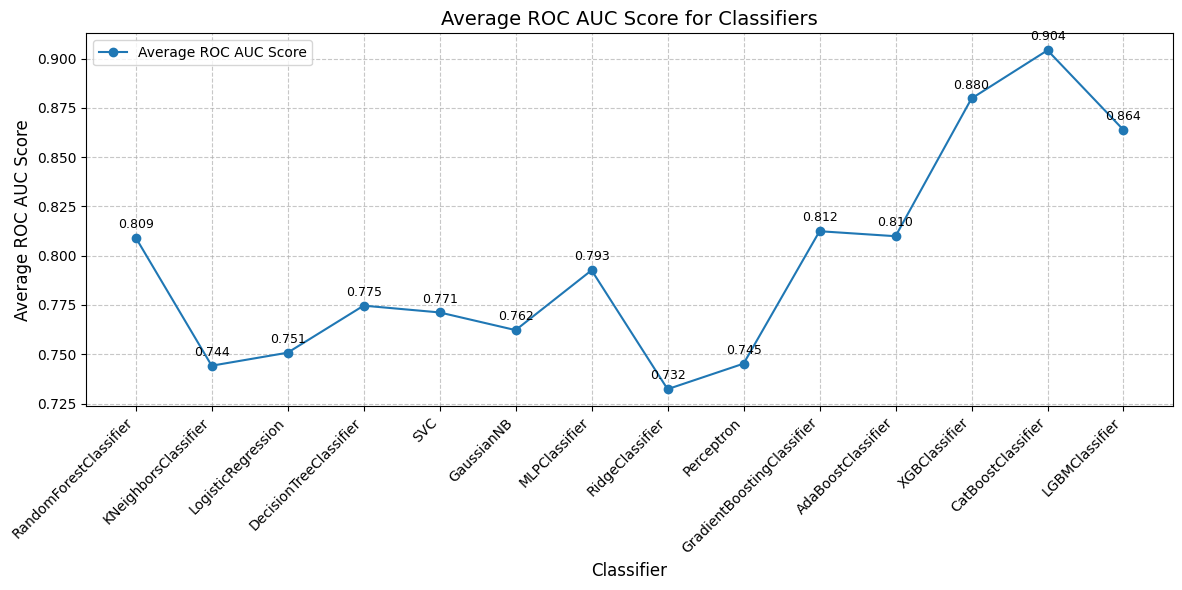

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Classifier names
classifiers = [
    "RandomForestClassifier",
    "KNeighborsClassifier",
    "LogisticRegression",
    "DecisionTreeClassifier",
    "SVC",
    "GaussianNB",
    "MLPClassifier",
    "RidgeClassifier",
    "Perceptron",
    "GradientBoostingClassifier",
    "AdaBoostClassifier",
    "XGBClassifier",
    "CatBoostClassifier",
    "LGBMClassifier"
]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(classifiers, AUC_set, marker='o', linestyle='-', label='Average ROC AUC Score')

# Annotate each data point with its value
for i, value in enumerate(AUC_set):
    plt.text(i, value + 0.005, f"{value:.3f}", ha='center', fontsize=9)

plt.xticks(rotation=45, ha='right')
plt.title('Average ROC AUC Score for Classifiers', fontsize=14)
plt.xlabel('Classifier', fontsize=12)
plt.ylabel('Average ROC AUC Score', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()

# Show plot
plt.show()

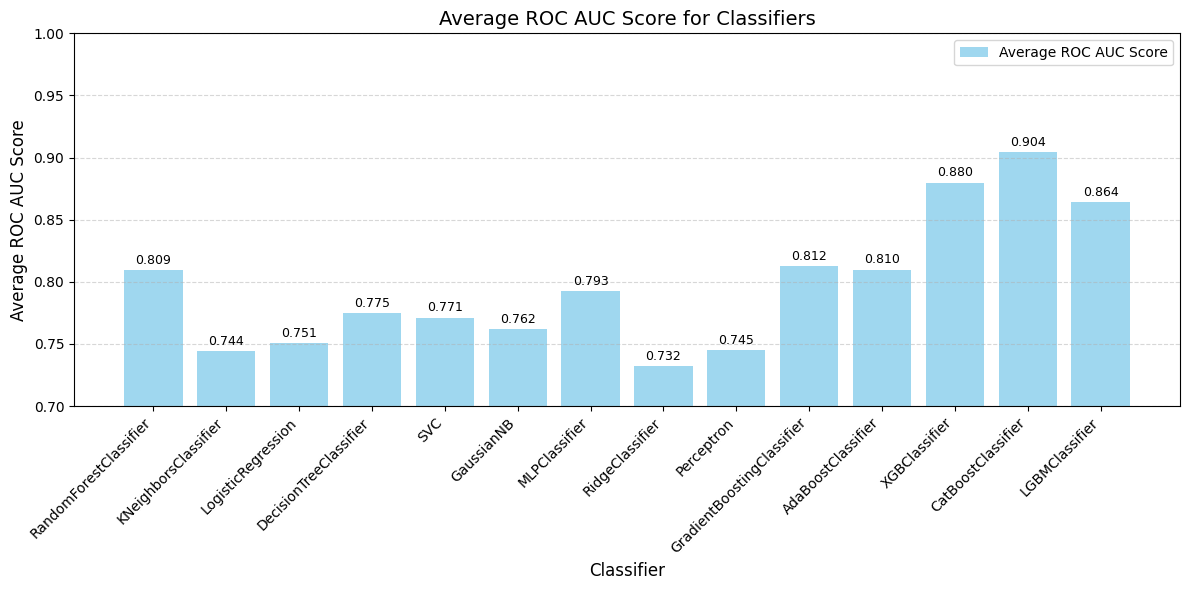

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Classifier names
classifiers = [
    "RandomForestClassifier",
    "KNeighborsClassifier",
    "LogisticRegression",
    "DecisionTreeClassifier",
    "SVC",
    "GaussianNB",
    "MLPClassifier",
    "RidgeClassifier",
    "Perceptron",
    "GradientBoostingClassifier",
    "AdaBoostClassifier",
    "XGBClassifier",
    "CatBoostClassifier",
    "LGBMClassifier"
]

# Plotting the bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(classifiers, AUC_set, color='skyblue', alpha=0.8, label='Average ROC AUC Score')

# Annotate each bar with its value
for bar, value in zip(bars, AUC_set):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.005, f"{value:.3f}", 
             ha='center', fontsize=9)  # Display AUC values above the bars

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Average ROC AUC Score for Classifiers', fontsize=14)
plt.xlabel('Classifier', fontsize=12)
plt.ylabel('Average ROC AUC Score', fontsize=12)
plt.ylim(0.7, 1.00)  
plt.grid(axis='y', linestyle='--', alpha=0.5)  
plt.legend(fontsize=10, loc='upper right')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


>>> Comparison of AUC Scores Before and After Threshold Modification (Plotting Graph)

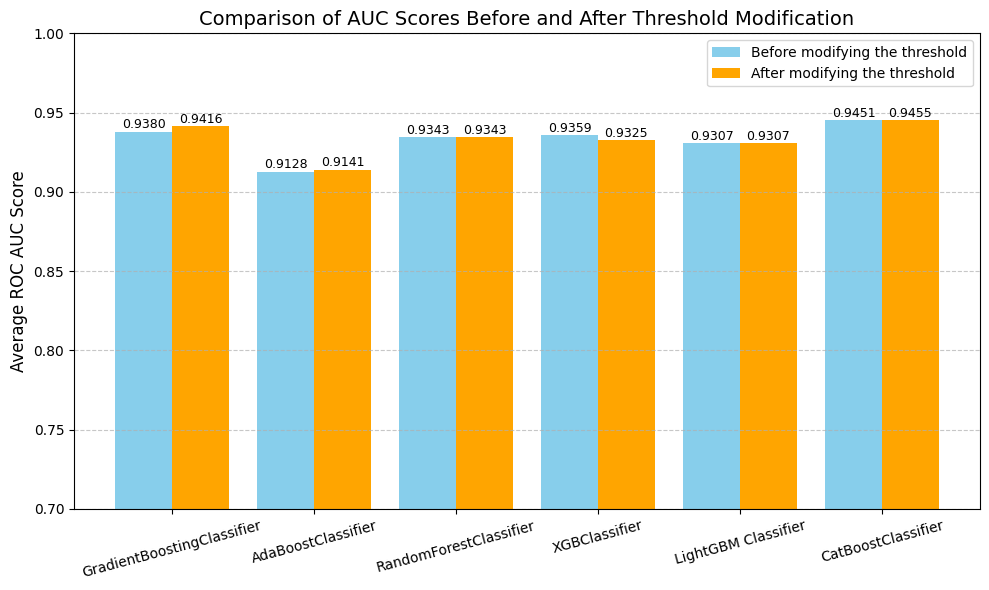

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = [
    "GradientBoostingClassifier",
    "AdaBoostClassifier",
    "RandomForestClassifier",
    "XGBClassifier",
    "LightGBM Classifier",
    "CatBoostClassifier"
]

# AUC values
auc_before_threshold = [0.9380, 0.9128, 0.9343, 0.9359, 0.9307, 0.9451]
auc_after_threshold = [0.9416, 0.9141, 0.9343, 0.9325, 0.9307, 0.9455]

# Bar width and positions
bar_width = 0.4
x = np.arange(len(models))

# Create the bar plot
plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - bar_width / 2, auc_before_threshold, bar_width, label='Before modifying the threshold', color='skyblue')
bars2 = plt.bar(x + bar_width / 2, auc_after_threshold, bar_width, label='After modifying the threshold', color='orange')

# Adjust x-ticks to be centered between the bars
plt.xticks(x, models, rotation=15, ha='center', fontsize=10)

# Add labels, title, and legend
plt.ylabel('Average ROC AUC Score', fontsize=12)
plt.title('Comparison of AUC Scores Before and After Threshold Modification', fontsize=14)
plt.legend(fontsize=10)

# Annotate each bar with its value
for bar, value in zip(bars1, auc_before_threshold):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.002, f"{value:.4f}", ha='center', fontsize=9)

for bar, value in zip(bars2, auc_after_threshold):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.002, f"{value:.4f}", ha='center', fontsize=9)

# Add grid lines and set y-axis limit
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0.70, 1.00)  # Set y-axis range

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


